## 3.1: Standardising data

When we standardise data, we transform it so that it has a mean of zero, and a standard deviation of 1. The transform is:

\begin{equation*}
Z = \frac{x - \mu}{\sigma}
\end{equation*}

where $x$ is our data, $\mu$ is the mean, and $\sigma$ is the standard deviation.

This transform can be applied to any data set: we are focused on the normal distribution here, but data that have other distributions can also be standardised using this same transform.

We will make some plots below to see the transform work:

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

In [2]:
# generate a sample of 5 random data points drawn from a normal distribution with
# mean = -3 and standard deviation = 5
x = np.random.normal(loc=-3, scale=5, size=5)
print(np.sort(x))

[-7.70644207 -3.95613416 -2.63011269  1.28945138  8.4289737 ]


In [3]:
# check the mean and standard deviation of the sample
# (these are the values that we will use for mu and sigma)
print('Mean = {:5.3f}, standard deviation = {:5.3f}'.format(np.mean(x), np.std(x)))

Mean = -0.915, standard deviation = 5.486


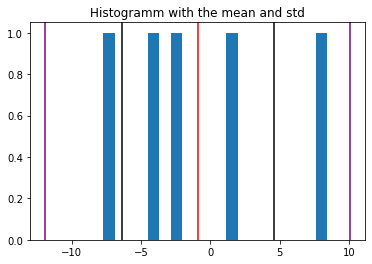

In [6]:
# enter code to plot a histogram of these 5 points, and add vertical lines to show
# the mean, the mean +/- 1*standard deviation, and the mean +/- 2*standard deviation
mu = np.mean(x)
sigma = np.std(x)
plt.figure()
plt.title('Histogramm with the mean and std')
plt.hist(x,bins=20)

plt.axvline(mu,color='red')

plt.axvline(mu + sigma,color='black')
plt.axvline(mu - sigma,color='black')

plt.axvline(mu + 2*sigma,color='purple')
plt.axvline(mu - 2*sigma,color='purple')
plt.show()

Let's consider the lines that you just plotted for mean + 1\*standard deviation and mean - 1\*standard deviation. If we define these two values as variables, $a$ and $b$:
\begin{equation*}
a = \mu + \sigma
\end{equation*}
\begin{equation*}
b = \mu - \sigma
\end{equation*}
then when we calculate the equivalent Z values using the standardisation transform:
\begin{align*}
Z_a &= \frac{a - \mu}{\sigma}\\
&= \frac{\mu + \sigma - \mu}{\sigma}\\
&= \frac{\sigma}{\sigma} = 1\\
\end{align*}
and similarly for b:
\begin{align*}
Z_b &= \frac{b - \mu}{\sigma}\\
&= \frac{\mu - \sigma - \mu}{\sigma}\\
&= \frac{-\sigma}{\sigma} = -1\\
\end{align*}

For any multiple of the standard deviation, $n\times\sigma$, we can just replace $\sigma$ by $n\times\sigma$ in the expressions for $a$ and $b$ above, and we see that our corresponding expressions for $Z_a$ and $Z_b$ simply become $Z_a=n$ and $Z_b=-n$.

The standardised variable, $Z$, thus expresses the distance from the mean in units of the standard deviation of the data sample.

1.0 -1.0


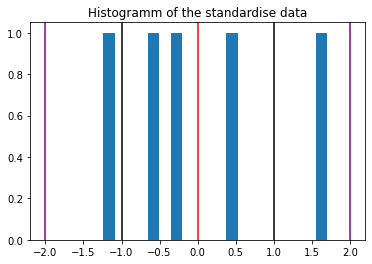

In [11]:
# enter code to standardise the sample data, x. Then, plot a histogram of these 
# standarised data, and add vertical lines to show the mean, the 
# mean +/- 1*standard deviation, and the mean +/- 2*standard deviation

#standardise the sample data
Z = (x-mu)/sigma
n = 1
a = mu + sigma
b = mu - sigma

Za = (a-mu)/sigma
Zb = (b-mu)/sigma

print(Za, Zb)

plt.figure()
plt.title('Histogramm of the standardise data')
plt.hist(Z,bins=20)

plt.axvline(mu-mu,color='red')

plt.axvline(Za,color='black')
plt.axvline(Zb,color='black')

plt.axvline(2*Za,color='purple')
plt.axvline(2*Zb,color='purple')
plt.show()

If we want to return to the original data from the standardised form, we need to carry out the reverse transform:
\begin{equation*}
x = \mu + (Z\times\sigma)
\end{equation*}
Note that if the only available data are the Z values, we cannot make the reverse transformation: we need to also know the mean and standard deviation of the original data to be able to retrieve the original values.

In [12]:
# enter code here to retrieve the original values of x
x_retrieve = mu + (Z*sigma)
print(x_retrieve)
print(x)

[-3.95613416 -7.70644207 -2.63011269  1.28945138  8.4289737 ]
[-3.95613416 -7.70644207 -2.63011269  1.28945138  8.4289737 ]


## 3.2: Finding the area under the standard normal curve

We saw the definition of the cumulative density function (CDF) in chapter 2: this is the integral of the PDF, and gives us the probability of obtaining a value less than or equal to the chosen value:

\begin{equation*}
CDF(x) = \int_{-\infty}^x p(x) dx
\end{equation*}

To find the probability of obtaining a value less than, or equal to a certain value, we can thus use the CDF. For the normal distribution, there is a ```scipy.stats``` module that we can use:

In [13]:
import scipy.stats as ss
ss.norm.cdf?

Signature: ss.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


The ```quantiles``` argument corresponds to the value that we want to check. For example, to find the probability of obtaining a value lying further than 2 standard deviations away from the mean, we will check the value at ```Z=-2```, to find the probability of obtaining a value that is smaller than ```mean(x) - 2*std(x)```:

In [14]:
ss.norm.cdf(-2)

0.022750131948179195

This result tells us that the probability of obtaining a value that is smaller than ```mean(x) - 2*std(x)``` is ~0.023. In other words, ~2.3% of the data are expected to be smaller than this for a normal distribution.

Remember the empirical rule: it tells us that ~95% of the data lie within 2 standard deviations of the mean for a normal distribution. Here, we found that ~2.3% of the data were less than Z=-2. Why do we have a value that is only half the expected value?

We need to take into account also the values that are larger than ```mean(x) + 2*std(x)```. Because the normal distribution is symmetric, we could just multiply that value that we found above by 2. Alternatively, we can find the probability that $Z \leq +2$, and use the fact that the total area under the curve must be 1 to find the probability of obtaining a value greater than ```Z=+2```:

In [15]:
1 - ss.norm.cdf(2)

0.02275013194817921

If we add the two together:

In [16]:
ss.norm.cdf(-2) + 1 - ss.norm.cdf(2)

0.045500263896358306

we obtain a value close to the ~5% stated by the empirical rule. The true value of ```Z``` that contains the central 95% of the data is approximately 1.96. Repeat the code above using ```Z=1.96``` to check this:

In [20]:
# enter your code here
2-1.96
ss.norm.cdf(-0.04) + 1 - ss.norm.cdf(0.04)

0.9680931262943385

## 3.3: Finding the Z-value associated with a certain probability integral

To find the Z-value associated with a given probability integral, we can use the *percent point function* (```ppf```). This does the inverse operation to the CDF function:
- for the CDF scipy function, we give a Z-value and obtain the probability of obtaining a Z-value less than or equal to the given value
- for the PPF scipy function, we give the probability of obtaining a Z-value less than or equal to some unknown Z-value, and we obtain the unknown Z-value

If we wanted to find the exact Z-value such that +/-Z contains the central 95% of the data, we would look for the Z-value where we have a 2.5% probability of obtaining a value less than or equal to that Z-value:

In [21]:
ss.norm.ppf(0.025)

-1.9599639845400545

This gives the lower value. For the upper value ($z_{0.025}$), we would require 97.5% of the data to be less than or equal to the required value (= 100 - 2.5%):

In [22]:
ss.norm.ppf(1 - 0.025)

1.959963984540054

Again, because the normal distribution is symmetric, the Z-values are symmetric when we isolate the highest 2.5% of the data and the lowest 2.5% of the data: $z_{0.025}=-z_{0.975}$

## 3.4: How to be lazy in Python

We have learnt about standardisation and Z-scores so that:   
1: you would be able to use tables to look up areas under the normal curve if you ever needed to do this   
2: you know what the $z_\alpha$ notation means   
3: you understand that all normal distributions have the same fundamental shape, and that this is simply scaled according to the standard deviation

In fact, in Python, you can actually completely avoid standardising or calculating the Z-scores, because scipy will do it all for you automatically...

If we want to calculate the probability of obtaining a value less than or equal to a certain value, we can pass the ```loc``` (=mean) and ```scale``` (=standard deviation) arguments to the ```cdf``` function, and it will standardise the data automatically. For example, let's calculate the probability of finding a value that is smaller than ```Z=-2```:

In [23]:
ss.norm.cdf(np.mean(x)-2*np.std(x),loc=np.mean(x),scale=np.std(x))

0.022750131948179195

You can check this against the result from section 3.2.

For each of the 5 values in the ```x``` sample from section 3.1, calculate the probability of obtaining a value less than or equal to that value of ```x```. Based on the probabilities, are any of your values in the outer 5% of the normal distribution?

In [38]:
# enter your code here
proba = 0
for i,xi in enumerate (np.sort(x)):
    proba = ss.norm.cdf(np.mean(x)-2*np.std(x),loc=np.mean(x),scale=np.std(x)) 
    print(proba)

0.022750131948179195
0.022750131948179195
0.022750131948179195
0.022750131948179195
0.022750131948179195


If we want to do the equivalent operation to section 3.3 (specify the probability and look for the associated Z-value), but we want to obtain the results in the units of our input data, not in terms of Z-values, we can again specify the ```loc``` and ```scale``` arguments when we use the ```ppf``` function.

Repeating the same analysis as section 3.3, we can find the data values such that 2.5% of the data are expected to be bigger / smaller than the given values:

In [29]:
ss.norm.ppf(0.025, loc = np.mean(x), scale = np.std(x))

-11.667296075749087

In [30]:
ss.norm.ppf(1 - 0.025, loc = np.mean(x), scale = np.std(x))

9.837590541405003

If you wish, you can re-use your code from section 3.1 to check that these values correspond to the Z-values obtained in section 3.3 using ```ss.norm.ppf(0.025)``` and ```ss.norm.ppf(1 - 0.025)```

In [ ]:
# enter your code here (optional)

According to the empirical rule, we expect 68% of the data distribution to lie within $\pm \sigma$ of the mean for normally-distributed data. Below, use the ```ppf``` function to estimate the data values that we expect to contain the central 68% of the data distribution. Compare these against your histogram from section 3.1 to check that everything looks ok.

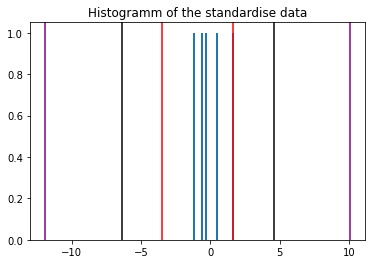

In [36]:
# enter your code here
plt.figure()
plt.title('Histogramm of the standardise data')
plt.hist(Z,bins=20)

plt.axvline(mu + sigma,color='black')
plt.axvline(mu - sigma,color='black')

plt.axvline(mu + 2*sigma,color='purple')
plt.axvline(mu - 2*sigma,color='purple')

plt.axvline(ss.norm.ppf(0.68, loc = np.mean(x), scale = np.std(x)),
            color = 'red',
           label = 'data ')
plt.axvline(ss.norm.ppf(1-0.68, loc = np.mean(x), scale = np.std(x)),color = 'red')
plt.show()